**PRIMER PARCIAL**









In [7]:
fecha = "18/04/2021"
nombre_apellido = "" # Debe ser un String
CI = "" # Debe ser un String

# Actividad 1- Importar las librerías numpy( como np ), pandas( como pd ), matplotlib( como plt ) 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Actividad 2- Importar el dataset 'datosfintrados.xls' 
datos = pd.read_csv('datosfiltrados.xls')

In [9]:
# NO MODIFICAR
grouped = datos.groupby(datos.Asignatura) 
datos_new = grouped.get_group("CALCULO 2") 
data = datos_new[['Primer.Par','Segundo.Par']].values
labels = datos_new['Aprobado'].values
labels = np.array([1.0 if i=='S' else 0.0 for i in labels])

In [10]:
# Actividad 3- Imprimir la dimensión de los datos y las etiquetas
data_shape = data.shape
label_shape = labels.shape
print("Dimensión de los datos = ",data_shape)
print("Dimensión de las etiquetas = ",label_shape)

Dimensión de los datos =  (1587, 2)
Dimensión de las etiquetas =  (1587,)


In [11]:
# Actividad 4- Separar los datos en conjunto de entrenamiento y de prueba con el "train_test_split"
#              usar el test_size = 0.1 
from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size = 0.1)
print("Dimensión de los datos entrenamiento = ",data_train.shape)
print("Dimensión de las etiquetas entrenamiento = ",data_test.shape)
print("Dimensión de los datos prueba = ",labels_train.shape)
print("Dimensión de las etiquetas prueba = ",labels_test.shape)

Dimensión de los datos entrenamiento =  (1428, 2)
Dimensión de las etiquetas entrenamiento =  (159, 2)
Dimensión de los datos prueba =  (1428,)
Dimensión de las etiquetas prueba =  (159,)


In [22]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import tensorflow.keras.backend as K
#from keras.models import Sequential
#from keras.layers import Dense

# Actividad 5- Crear el modelo de una Red Neuronal Densa:
#                 * 1 Capa de entrada de 7 neuronas, con función de activación lineal 'linear' e incluir la dimensión de entrada - input_shape                 
#                 * 2 Capas ocultas de 5 neuronas cada una y con función de activación tangente hiperbólico 'tanh'
#                 * 1 Capa Oculta de 10 neuronas y con función de activación sigmoide 'sigmoid'

model = Sequential()
model.add(Dense(7, activation='linear', input_shape=(2,)))
model.add(Dense(5, activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
# Actividad 6- Completar la variable loss_func con la función de pérdida que creas que sea
#               Lineal => 'mse'
#               Binaria => 'binary_crossentropy'
loss_func = 'binary_crossentropy'
model.compile(optimizer = 'adam', loss = loss_func, metrics = 'accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 21        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


Epoch 1/1000
41/41 [==============================] - 7s 53ms/step - loss: 0.8021 - accuracy: 0.3592 - val_loss: 0.7141 - val_accuracy: 0.4825
Epoch 2/1000
41/41 [==============================] - ETA: 0s - loss: 0.7363 - accuracy: 0.49 - 0s 11ms/step - loss: 0.7338 - accuracy: 0.5053 - val_loss: 0.6699 - val_accuracy: 0.6364
Epoch 3/1000
41/41 [==============================] - 0s 11ms/step - loss: 0.6666 - accuracy: 0.6193 - val_loss: 0.6480 - val_accuracy: 0.6364
Epoch 4/1000
41/41 [==============================] - 0s 8ms/step - loss: 0.6621 - accuracy: 0.5793 - val_loss: 0.6343 - val_accuracy: 0.6364
Epoch 5/1000
41/41 [==============================] - 0s 8ms/step - loss: 0.6363 - accuracy: 0.6089 - val_loss: 0.6258 - val_accuracy: 0.6783
Epoch 6/1000
41/41 [==============================] - 0s 5ms/step - loss: 0.6080 - accuracy: 0.7131 - val_loss: 0.6198 - val_accuracy: 0.6503
Epoch 7/1000
41/41 [==============================] - 0s 5ms/step - loss: 0.6053 - accuracy: 0.6890 - v

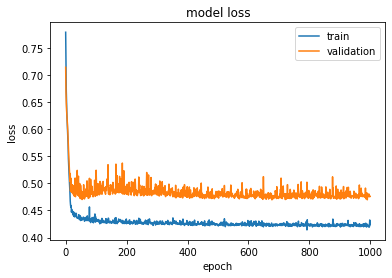

In [24]:
# NO MODIFICAR

# Entrenar el modelo 
history = model.fit(data_train, labels_train, epochs=1000, verbose=1, validation_split=0.1)
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [25]:
# Actividad 7- usar model.predict sobre los datos de prueba (data_test)

# Evaluar el modelo
predictions = model.predict(data_test)
print(model.evaluate(data_test, labels_test))
print(model.metrics_names)

5/5 [==============================] - 0s 2ms/step - loss: 0.3717 - accuracy: 0.8553
[0.37170517444610596, 0.8553459048271179]
['loss', 'accuracy']


Cantidad de predicciones = (159, 1) 

[[63 13]
 [10 73]]


<AxesSubplot:>

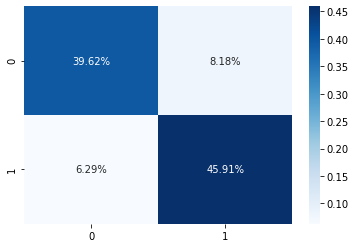

In [26]:
# NO MODIFICAR

from sklearn.metrics import confusion_matrix, classification_report  

predict_label = predictions.round()

print('Cantidad de predicciones = {} \n'.format(predict_label.shape))

cf_matrix = confusion_matrix(predict_label, labels_test)
print(cf_matrix)

import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [27]:
# NO MODIFICAR ESTE CÓDIGO

# Código de evaluación - Deberá copiar el texto generado en este campo y pegar en la evaluacion del aula virtual

print("Fecha = \'{}\'".format(fecha),end =";")
print("nombre_apellido = \'{}\'".format(nombre_apellido),end =";")
print("CI = \'{}\'".format(CI), end =";")
# Tema 1
print( 'Tema1 = {0:b}'.format(('np' in vars() or 'np' in globals())<<2|('pd' in vars() or 'pd' in globals())<<1|('plt' in vars() or 'plt' in globals())<<0), end =";")
# Tema 2
print( 'Tema2 = \'{}{}\''.format(int('datos' in vars() or 'datos' in globals()), datos['id_anony'].iloc[0]), end =";")
# Tema 3
print( 'Tema3 = {}{}{}'.format(data_shape[0],data_shape[1],label_shape[0]), end =";")
# Tema 4
print( 'Tema4 = {}{}'.format(data_train.size, labels_test.size), end =";")
# Tema 5
print( 'Tema5 = {}'.format(model.count_params()), end =";")
# Tema 6
print( 'Tema6 = \'{}\''.format(loss_func), end =";")
# Tema 6
print( 'Tema7 = {}'.format(predictions.size), end =";")

Fecha = '18/04/2021';nombre_apellido = '';CI = '';Tema1 = 111;Tema2 = '1es_1444';Tema3 = 158721587;Tema4 = 2856159;Tema5 = 97;Tema6 = 'binary_crossentropy';Tema7 = 159;